In [ ]:
!pip install pillow matplotlib numpy

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
def load_image(path):
    img = Image.open(path).convert('RGB')
    return np.array(img)

image_path = "/content/image.jpg"  # change filename
img_array = load_image(image_path)

print("Image shape:", img_array.shape)

Image shape: (192, 204, 3)


In [ ]:
def color_complexity(img_array):
    pixels = img_array.reshape(-1, 3)
    unique_colors = len(np.unique(pixels, axis=0))
    return unique_colors

colors = color_complexity(img_array)
print("Unique colors:", colors)

Unique colors: 22546


In [ ]:
def texture_variance(img_array):
    gray = np.mean(img_array, axis=2)
    return np.var(gray)

variance = texture_variance(img_array)
print("Texture variance:", variance)

Texture variance: 2186.487194315368


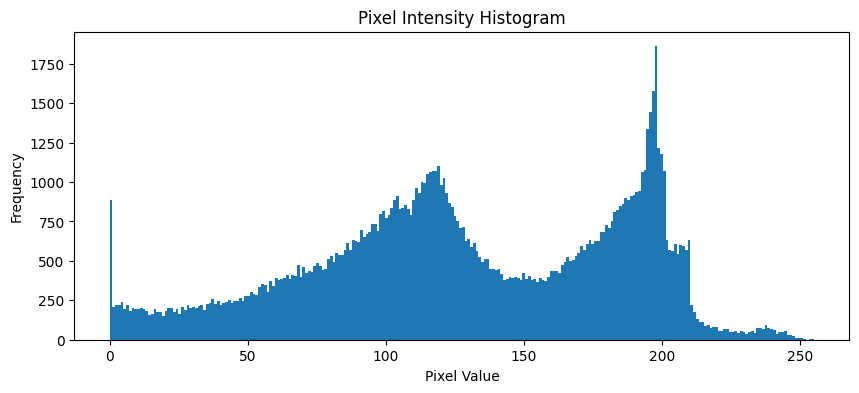

In [ ]:
def plot_histogram(img_array):
    pixels = img_array.flatten()

    plt.figure(figsize=(10,4))
    plt.hist(pixels, bins=256)
    plt.title("Pixel Intensity Histogram")
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.show()

plot_histogram(img_array)

#This basically plots the histogram of frequency of an pixel value, for a normal image this is very random but for a steganographic image it is smooth due to changes in LSB

In [ ]:
if colors > 10000 and variance > 500:
    print("Image is highly textured and color-rich.")
    print("High entropy may be natural. Steganography less likely.")
else:
    print("Image has limited texture or colors.")
    print("Steganography indicators are more reliable.")

Image is highly textured and color-rich.
High entropy may be natural. Steganography less likely.


In [ ]:
def even_odd_analysis(img_array):
    pixels = img_array.flatten()
    even = np.sum(pixels % 2 == 0)
    odd = np.sum(pixels % 2 == 1)

    ratio = abs(even - odd) / len(pixels)
    return even, odd, ratio

even, odd, ratio = even_odd_analysis(img_array)

print(f"Even pixels: {even}")
print(f"Odd pixels: {odd}")
print(f"Even-Odd Ratio Difference: {ratio:.6f}")

#Here we are calculating the ration of even VS odd parity of the LSB due to changes in LSB in a steganographic image even and odd parity becomes almost equal hence if the ration is tending to 1 i.e. It is more likely to be a steganographic image

Even pixels: 110985
Odd pixels: 6231
Even-Odd Ratio Difference: 0.893683


In [ ]:
def lsb_entropy(img_array):
    pixels = img_array.flatten()
    lsb = pixels & 1

    p0 = np.sum(lsb == 0) / len(lsb)
    p1 = np.sum(lsb == 1) / len(lsb)

    entropy = 0
    if p0 > 0:
        entropy -= p0 * math.log2(p0)
    if p1 > 0:
        entropy -= p1 * math.log2(p1)

    return entropy

entropy = lsb_entropy(img_array)
print(f"LSB Entropy: {entropy:.4f}")

#Entropy can be defined as randomness or predictibility of something, Normal images are random but their LSB isn't that random it is slightly more baised towards one 0 or 1 i.e. easily a pattern can be identified in them hence their randomness is less hence their entropy is less but in steganographic image the LSV is on purpose made more complex; more random therefore the entropy is high

LSB Entropy: 0.2997


In [ ]:
def stego_score(ratio, entropy):
    score = ((1-ratio) * 100 + entropy * 100)/2

    return score

score = stego_score(ratio, entropy)

print(f"Steganography Suspicion Score: {score:.2f}/100")


#We use 1-ratio because in steganographic images the difference between even and odd parity is very less hence the ratio is very small so ratio and risk of streganographic risk is inversly proportional

Steganography Suspicion Score: 20.30/100


In [ ]:
if score > 78 and colors < 10000:
    verdict = "HIGH probability of steganography 🚨"
elif score > 78 and colors >= 10000:
    verdict = "HIGH entropy due to natural texture ⚠️"
else:
    verdict = "LOW probability – image likely clean ✅"

print(verdict)

LOW probability – image likely clean ✅
